# Auto Insurance 

### Notebook Imports
***

In [2]:
%matplotlib inline
%run ../python_files/imports

### Gather Data
***

In [18]:
auto_df = pd.read_csv('../data/auto_insurance_data.csv')

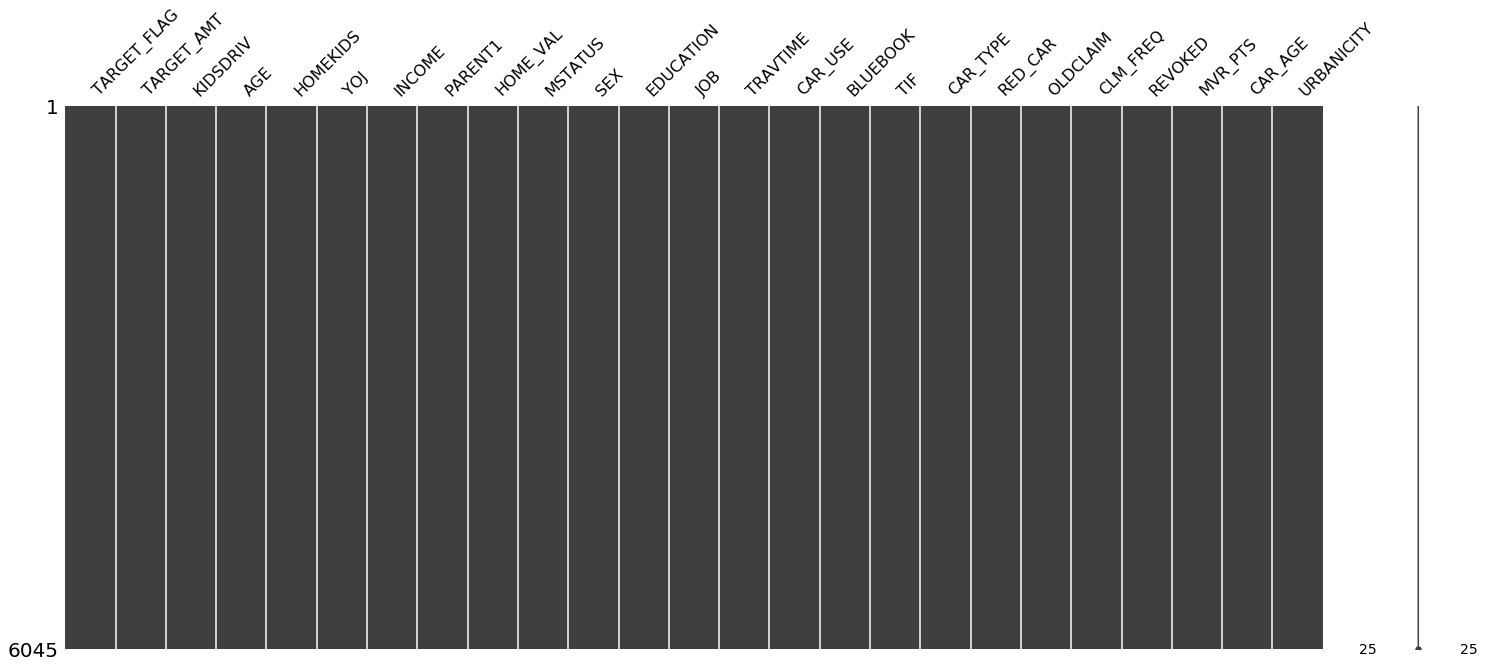

In [19]:
missingno.matrix(auto_df)

In [22]:
auto_df.SEX.value_counts()

F    3359
M    2686
Name: SEX, dtype: int64

# Visualizing Data 
***

In [23]:
auto_df.AGE.unique().sum()

2730

In [24]:
auto_df.TARGET_AMT.value_counts()

0.00000        4443
3667.00000        3
2027.00000        3
5453.00000        3
3350.00000        3
               ... 
4439.00000        1
7786.00000        1
2408.00000        1
1698.00000        1
60846.53042       1
Name: TARGET_AMT, Length: 1485, dtype: int64

In [25]:
auto_df.TARGET_AMT.describe()

count     6045.000000
mean      1479.662715
std       4553.172055
min          0.000000
25%          0.000000
50%          0.000000
75%       1037.000000
max      85523.653350
Name: TARGET_AMT, dtype: float64

In [33]:
auto_df.TARGET_AMT.value_counts() > 30000

0.00000        False
3667.00000     False
2027.00000     False
5453.00000     False
3350.00000     False
               ...  
4439.00000     False
7786.00000     False
2408.00000     False
1698.00000     False
60846.53042    False
Name: TARGET_AMT, Length: 1485, dtype: bool

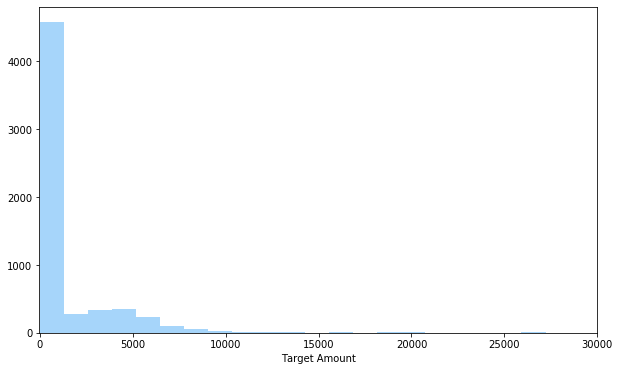

In [29]:
plt.figure(figsize=(10, 6))
sns.distplot(auto_df['TARGET_AMT'],bins=66, hist=True, kde=False, color='#2196f3')
plt.xlabel('Target Amount')
plt.xlim(left=-20, right=30000)

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(auto_df['AGE'], bins=33, ec='black', color='#2196f3')
plt.xlabel('Age')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(auto_df['AGE'], bins=33, hist=True, kde=False, color='#fbc02d')
plt.show()

In [ ]:
auto_df.CLM_FREQ.value_counts()

In [ ]:
auto_df.info()

In [ ]:
auto_df.describe()

## Correlation

In [ ]:
auto_df['INCOME'].corr(auto_df['HOME_VAL'])

In [ ]:
auto_df.corr(method='spearman')

In [ ]:
mask = np.zeros_like(auto_df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

In [ ]:

plt.figure(figsize=(35,30))
ax = sns.heatmap(auto_df.corr(method='spearman'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.ylabel(ylabel=' ', labelpad=100)
plt.show()

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'])
plt.title('Income vs Bluebook value')
plt.xlabel('Income')
plt.ylabel('Bluebook value')
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['CLM_FREQ'], y=auto_df['TARGET_AMT'], size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'], kind='hex', height=7, color='blue')
plt.show()

In [ ]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=auto_df['INCOME'], y=auto_df['BLUEBOOK'], height=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

In [ ]:
sns.lmplot(x='INCOME', y='BLUEBOOK', data=auto_df, height=7)

In [ ]:
%%time

sns.pairplot(auto_df)
plt.show()

In [ ]:
%%time

sns.pairplot(auto_df, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

## Training & Test Dataset Split